In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set(style ="whitegrid",context="notebook")
plt.rcParams['figure.figsize'] =(10,5)

In [2]:
df = pd.read_csv('/content/Data 2.csv')
#1st Five Rows
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,1adedef3b9733f6a1859137ce37d8c685ad36cea,7d2e7cdd59237335e96b9b1a897a5e48cb4df467e6c092...,12/31/2023 11:45:00 PM,12/31/2023 11:45:00 PM,121,0.45,NaN,NaN,8.0,8.0,...,$0.00,$6.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,23a321e48c465182b749d4e3d6fb901b39a28c36,c09f5ee2dc22a2a3c342dd27432eb0fe98506ef3698f5b...,12/31/2023 11:45:00 PM,12/31/2023 11:45:00 PM,6,0.0,NaN,NaN,3.0,3.0,...,$0.00,$40.50,Credit Card,Sun Taxi,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,f3a139c0df3513324ff3f699bf40db2e84291e3a,9b48ad5744e86450fb4db78e7095a6827bafc43a6a9d9a...,12/31/2023 11:45:00 PM,01-01-2024 00:00,"1,228",4.29,NaN,NaN,6.0,21.0,...,$0.00,$15.25,Cash,Sun Taxi,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.938666,-87.711211,POINT (-87.7112105933 41.9386661962)
3,0ed132d8a023dde8abb89dba58fa04f35fe9bdb1,80919866bf50fd1163efd329eb8a9fdf198fda2465473a...,12/31/2023 11:45:00 PM,01-01-2024 00:00,769,0.74,1.703108e+10,1.703108e+10,8.0,8.0,...,$0.00,$9.00,Mobile,Blue Ribbon Taxi Association,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
4,cb50d6951086242beccb8fe7d248cfad3fab3dd7,179f1a051e9e6d3fc0726628962faff68506086ee8df14...,12/31/2023 11:45:00 PM,01-01-2024 00:00,"1,383",17.95,NaN,NaN,28.0,NaN,...,$0.00,$55.31,Credit Card,Blue Ribbon Taxi Association,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),NaN,NaN,NaN


In [3]:
df.tail()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
1048570,6ebf2841a890169299fd5d116a6881cf35c716be,be3521efe46e61fe704e9c0311dd06f4a295fa8b901901...,10/28/2023 11:15:00 AM,10/28/2023 11:15:00 AM,420,0.0,NaN,NaN,8.0,8.0,...,$1.00,$7.75,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1048571,097901bde76c1b03138ac4b40366403baf8a57e0,411767ddfe72ac709e1442e69fb39ae68c97382b53bbdb...,10/28/2023 11:15:00 AM,10/28/2023 12:00:00 PM,"2,179",17.44,1.703198e+10,1.703108e+10,76.0,8.0,...,$5.00,$59.40,Credit Card,Taxicab Insurance Agency Llc,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
1048572,73dd346f0acc1f6f4044eb0445c2dd66d3b9fd11,d51d7320d994f73bc976378ef9c4bc657664d5b8581ef1...,10/28/2023 11:15:00 AM,10/28/2023 12:00:00 PM,"2,235",12.97,NaN,NaN,76.0,1.0,...,$5.00,$47.15,Credit Card,Medallion Leasin,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),42.009623,-87.670167,POINT (-87.6701668569 42.0096228806)
1048573,c766699a877059b96b76fb63cef6833862834b8d,398e9ade4dcb28cfd9fc422739cf04efedce1853f93cc7...,10/28/2023 11:15:00 AM,10/28/2023 11:15:00 AM,362,0.83,NaN,NaN,8.0,8.0,...,$0.00,$5.50,Cash,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1048574,86024e9157e843fddccd9f96372fb0a641a0fc1c,de0630d5fd44086c10bf51d621f2151eb38fbc523ebb97...,10/28/2023 11:15:00 AM,10/28/2023 12:00:00 PM,"2,160",19.1,NaN,NaN,48.0,56.0,...,$0.00,$48.25,Unknown,3556 - 36214 RC Andrews Cab,41.729676,-87.572717,POINT (-87.5727171342 41.7296764229),41.792592,-87.769615,POINT (-87.7696154528 41.7925923603)


In [4]:
print("Shape of the Dataset")
print(df.shape)

Shape of the Dataset
(1048575, 23)


In [5]:
# Standardized column names :
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ','_')
    .str.strip()
)

print("Standardized column names :")
print(df.columns)

Standardized column names :
Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'pickup_centroid_location',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'dropoff_centroid__location'],
      dtype='object')


In [6]:
print("Datatypes of Each Column: ")
print(df.dtypes)

Datatypes of Each Column: 
trip_id                        object
taxi_id                        object
trip_start_timestamp           object
trip_end_timestamp             object
trip_seconds                   object
trip_miles                     object
pickup_census_tract           float64
dropoff_census_tract          float64
pickup_community_area         float64
dropoff_community_area        float64
fare                           object
tips                           object
tolls                          object
extras                         object
trip_total                     object
payment_type                   object
company                        object
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
pickup_centroid_location       object
dropoff_centroid_latitude     float64
dropoff_centroid_longitude    float64
dropoff_centroid__location     object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trip_id                     1048575 non-null  object 
 1   taxi_id                     1048573 non-null  object 
 2   trip_start_timestamp        1048575 non-null  object 
 3   trip_end_timestamp          1048553 non-null  object 
 4   trip_seconds                1048340 non-null  object 
 5   trip_miles                  1048573 non-null  object 
 6   pickup_census_tract         448852 non-null   float64
 7   dropoff_census_tract        434361 non-null   float64
 8   pickup_community_area       1020868 non-null  float64
 9   dropoff_community_area      954594 non-null   float64
 10  fare                        1045970 non-null  object 
 11  tips                        1045970 non-null  object 
 12  tolls                       1045970 non-null  object 
 1

In [8]:
print("\n Descriptive Statistics for Numerical Columns: ")
print(df.describe())


 Descriptive Statistics for Numerical Columns: 
       pickup_census_tract  dropoff_census_tract  pickup_community_area  \
count         4.488520e+05          4.343610e+05           1.020868e+06   
mean          1.703150e+10          1.703141e+10           3.541958e+01   
std           3.721367e+05          3.406688e+05           2.605379e+01   
min           1.703101e+10          1.703101e+10           1.000000e+00   
25%           1.703108e+10          1.703108e+10           8.000000e+00   
50%           1.703132e+10          1.703132e+10           3.200000e+01   
75%           1.703198e+10          1.703184e+10           5.600000e+01   
max           1.703198e+10          1.703198e+10           7.700000e+01   

       dropoff_community_area  pickup_centroid_latitude  \
count           954594.000000              1.021266e+06   
mean                25.925801              4.190085e+01   
std                 20.686298              6.390731e-02   
min                  1.000000          

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_census_tract,448852.0,1.703150e+10,372136.707234,1.703101e+10,1.703108e+10,1.703132e+10,1.703198e+10,1.703198e+10
dropoff_census_tract,434361.0,1.703141e+10,340668.771380,1.703101e+10,1.703108e+10,1.703132e+10,1.703184e+10,1.703198e+10
pickup_community_area,1020868.0,3.541958e+01,26.053786,1.000000e+00,8.000000e+00,3.200000e+01,5.600000e+01,7.700000e+01
dropoff_community_area,954594.0,2.592580e+01,20.686298,1.000000e+00,8.000000e+00,2.800000e+01,3.200000e+01,7.700000e+01
pickup_centroid_latitude,1021266.0,4.190085e+01,0.063907,4.165022e+01,4.187887e+01,4.189503e+01,4.196581e+01,4.201605e+01
pickup_centroid_longitude,1021266.0,-8.769935e+01,0.112668,-8.791362e+01,-8.775093e+01,-8.764250e+01,-8.762519e+01,-8.753490e+01
dropoff_centroid_latitude,960059.0,4.189294e+01,0.057461,4.166014e+01,4.187887e+01,4.189251e+01,4.192269e+01,4.202122e+01
dropoff_centroid_longitude,960059.0,-8.766039e+01,0.070503,-8.791362e+01,-8.766352e+01,-8.763331e+01,-8.762519e+01,-8.753490e+01


In [10]:
print("\n Unique values and their Counts for categorial Columns: ")
for column in df.select_dtypes(include = 'object').columns:
  print(f"\n Columns :{column }")
  print(df[column].value_counts())


 Unique values and their Counts for categorial Columns: 

 Columns :trip_id
trip_id
86024e9157e843fddccd9f96372fb0a641a0fc1c    1
1adedef3b9733f6a1859137ce37d8c685ad36cea    1
23a321e48c465182b749d4e3d6fb901b39a28c36    1
f3a139c0df3513324ff3f699bf40db2e84291e3a    1
0ed132d8a023dde8abb89dba58fa04f35fe9bdb1    1
                                           ..
d51430f93404726b121d82d42efc29a2062895a8    1
5bf80daf02fc3a3bab75740a1f72ebc09d4b0fe2    1
ce61e0f21271970f7bf3006d489638d1c320a62f    1
fd4f3f628496b076e06a91e6933bb12489e1c65a    1
5beed53a8f8bf37104223411fef93b1aa2df46e8    1
Name: count, Length: 1048575, dtype: int64

 Columns :taxi_id
taxi_id
d40dae7ea46d61abca67eb53b157fe9cf0b485cca6dce122604588a69aa6c4b6b78e0e5c5fd11f9702babd94016122df1d328a459c8b7de2cb37a1bad947b1fe    1989
236d69ab4ab280fb016ce8792f5681c2afe0e6321a8c99e3e96b4ba41308c703231f033148e495ed0c04c361778634dbbfd18e635238031ba8fde16e7a28f7b7    1587
ea1095a215ac661a9a0da3f84747131c7bc3e6b71308b515fb58d957102ae915c

In [11]:
#Missing Value counts
missing_values = df.isnull().sum()
print("Missing Values Per Columns")
print(missing_values)

Missing Values Per Columns
trip_id                            0
taxi_id                            2
trip_start_timestamp               0
trip_end_timestamp                22
trip_seconds                     235
trip_miles                         2
pickup_census_tract           599723
dropoff_census_tract          614214
pickup_community_area          27707
dropoff_community_area         93981
fare                            2605
tips                            2605
tolls                           2605
extras                          2605
trip_total                      2605
payment_type                       0
company                            0
pickup_centroid_latitude       27309
pickup_centroid_longitude      27309
pickup_centroid_location       27309
dropoff_centroid_latitude      88516
dropoff_centroid_longitude     88516
dropoff_centroid__location     88516
dtype: int64


In [12]:
print("Duplicated Row Count :", df.duplicated().sum())

Duplicated Row Count : 0


In [13]:
#converting Object to numeric
df["trip_seconds"] = df["trip_seconds"].astype(str).str.replace(",", "")
df["trip_seconds"] = pd.to_numeric(df["trip_seconds"], errors="coerce")

df['trip_miles'] = pd.to_numeric(df['trip_miles'], errors="coerce")

In [14]:
# converting Currency columns to Numeric
df['fare'] = df['fare'].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
df['tips'] = df['tips'].astype(str).str.replace("$", "", regex=False).astype(float)
df['tolls'] = df['tolls'].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
df['extras'] = df['extras'].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
df["trip_total"] = df["trip_total"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

In [15]:
# Converting Timestamps to Datetime
df["trip_start_timestamp"] = pd.to_datetime(df["trip_start_timestamp"], errors="coerce")
df["trip_end_timestamp"] = pd.to_datetime(df["trip_end_timestamp"], errors="coerce")

In [16]:
#converting Float to Object
df["pickup_centroid_latitude"] = df["pickup_centroid_latitude"].astype(str)
df["pickup_centroid_longitude"] = df["pickup_centroid_longitude"].astype(str)
df["dropoff_centroid_latitude"] = df["dropoff_centroid_latitude"].astype(str)
df["dropoff_centroid_longitude"] = df["dropoff_centroid_longitude"].astype(str)

In [17]:
df["pickup_census_tract"] = df["pickup_census_tract"].astype(str)
df["dropoff_census_tract"] = df["dropoff_census_tract"].astype(str)
df["pickup_community_area"] = df["pickup_community_area"].astype(str)
df["dropoff_community_area"] = df["dropoff_community_area"].astype(str)

In [18]:
print("Updated Datatypes of Each Column")
(df.dtypes)

Updated Datatypes of Each Column


,0
trip_id,object
taxi_id,object
trip_start_timestamp,datetime64[ns]
trip_end_timestamp,datetime64[ns]
trip_seconds,float64
trip_miles,float64
pickup_census_tract,object
dropoff_census_tract,object
pickup_community_area,object
dropoff_community_area,object


In [19]:
 #Handling Null Values:
df['taxi_id'] = df['taxi_id'].fillna('Unknown')
df['pickup_centroid_location'] = df['pickup_centroid_location'].fillna('Unknown')
df['dropoff_centroid__location'] = df['dropoff_centroid__location'].fillna('Unknown')

In [20]:
# Fill null trip_end_timestamp with trip_start_timestamp
df['trip_end_timestamp'] = df['trip_end_timestamp'].fillna(df['trip_start_timestamp'])

# handling exiting nulls in 'trip_seconds'.
calculated_seconds = (df['trip_end_timestamp'] - df['trip_start_timestamp']).dt.total_seconds()

#null 'trip_seconds' with the calculated duration
df['trip_seconds'] = df['trip_seconds'].fillna(calculated_seconds)

# Set 'trip_seconds' to 0 where 'trip_miles' is 0
df.loc[(df['trip_miles'] == 0) & (df['trip_seconds'].isna()), 'trip_seconds'] = 0

In [21]:
#filling trip miles = 0 , where trip second = 0
df.loc[df["trip_seconds"] == 0, "trip_miles"] = 0

In [22]:
# missing 'trip_miles' with the median
df['trip_miles'] = df['trip_miles'].fillna(df['trip_miles'].median())

In [23]:
# missing 'fare', 'tips', 'tolls', 'extras' with their respective mean values
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['tips'] = df['tips'].fillna(df['tips'].mean())
df['tolls'] = df['tolls'].fillna(df['tolls'].mean())
df['extras'] = df['extras'].fillna(df['extras'].mean())

#  'trip_total' = 'fare'+'tips''tolls' using the filled values
df['trip_total'] = df['fare'] + df['tips'] + df['tolls'] + df['extras']

In [24]:
#Replacing all Nan values to Unknown
df = df.replace("nan", "Unknown")

In [25]:
print('Updated Missing Values Per Column:')
print(df.isnull().sum())

Updated Missing Values Per Column:
trip_id                       0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  0
trip_miles                    0
pickup_census_tract           0
dropoff_census_tract          0
pickup_community_area         0
dropoff_community_area        0
fare                          0
tips                          0
tolls                         0
extras                        0
trip_total                    0
payment_type                  0
company                       0
pickup_centroid_latitude      0
pickup_centroid_longitude     0
pickup_centroid_location      0
dropoff_centroid_latitude     0
dropoff_centroid_longitude    0
dropoff_centroid__location    0
dtype: int64


In [26]:
#Creating new Columns
df['trip_minutes'] = (df['trip_seconds'] / 60).round(0)
df["trip_hour"] = df["trip_start_timestamp"].dt.hour
df['trip_day'] = df['trip_start_timestamp'].dt.day_name()
df["trip_month"] = df["trip_start_timestamp"].dt.month_name()
df["trip_year"] = df["trip_start_timestamp"].dt.year

In [27]:
# distance bins and labels based on the distribution
distance_bins = [ -1 , 2 ,  5, 10, df['trip_miles'].max() + 1]
distance_labels = ['Very Short Distance', 'Short Distance', 'Medium Distance', 'Long Distance']

# new 'distance_label' column
df['distance_label'] = pd.cut(
    df['trip_miles'],
    bins=distance_bins,
    labels=distance_labels,
    right=True
)

print("Value counts for the new 'distance_label' column:")
print(df['distance_label'].value_counts())

Value counts for the new 'distance_label' column:
distance_label
Very Short Distance    468830
Long Distance          312167
Short Distance         149718
Medium Distance        117860
Name: count, dtype: int64


In [28]:
# Define duration bins and labels
duration_bins = [0, 30, 60, 120, 360, df['trip_minutes'].max() + 1]
duration_labels = ["Very Short Trip","Short Trip","Medium Trip","Long Trip", "Very Long Trip"]

#negative trip_minutes to 0
df.loc[df['trip_minutes'] < 0, 'trip_minutes'] = 0

# Create the new 'duration_label' column
df['duration_label'] = pd.cut(
    df['trip_minutes'],
    bins=duration_bins,
    labels=duration_labels,
    right=False)

print("Value counts for the new 'duration_label' column:")
print(df['duration_label'].value_counts())

Value counts for the new 'duration_label' column:
duration_label
Very Short Trip    812478
Short Trip         208709
Medium Trip         25293
Long Trip            1360
Very Long Trip        735
Name: count, dtype: int64


In [29]:
print("Shape after inserting new columns")
print(df.shape)

Shape after inserting new columns
(1048575, 30)


In [30]:
print('Updated Missing Values Per Column:')
print(df.isnull().sum())

Updated Missing Values Per Column:
trip_id                       0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  0
trip_miles                    0
pickup_census_tract           0
dropoff_census_tract          0
pickup_community_area         0
dropoff_community_area        0
fare                          0
tips                          0
tolls                         0
extras                        0
trip_total                    0
payment_type                  0
company                       0
pickup_centroid_latitude      0
pickup_centroid_longitude     0
pickup_centroid_location      0
dropoff_centroid_latitude     0
dropoff_centroid_longitude    0
dropoff_centroid__location    0
trip_minutes                  0
trip_hour                     0
trip_day                      0
trip_month                    0
trip_year                     0
distance_label                0
duration_label                0
dtype

In [31]:
df.to_csv("Cleaned_taxirides.csv", index = False)

In [48]:
#Monthly Taxi Rides
monthly = df['trip_month'].value_counts().sort_index(ascending = False)
print(monthly)


trip_month
October      55725
November    527797
December    465053
Name: count, dtype: int64


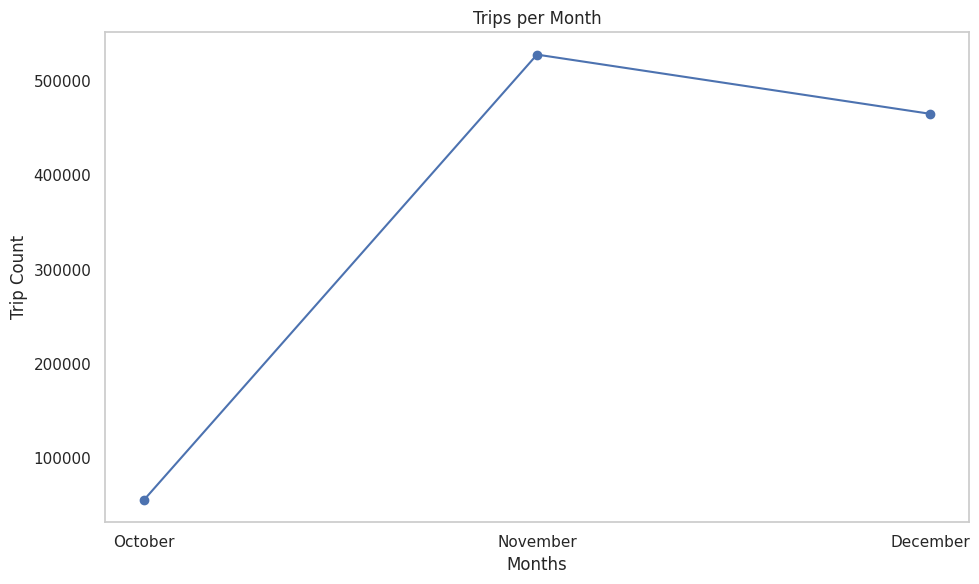

In [49]:
plt.figure(figsize = (10, 6))
monthly.plot(kind = 'line', marker='o')
plt.title("Trips per Month")
plt.xlabel("Months")
plt.ylabel("Trip Count")
plt.grid(False)
plt.tight_layout()
plt.show()

In [58]:
#average trip total vs payment rype
total_fare=df.groupby('payment_type')['fare'].sum()
print(total_fare)

payment_type
Cash           5.439261e+06
Credit Card    1.084551e+07
Dispute        7.378600e+03
Mobile         2.483791e+06
No Charge      7.860550e+03
Prcard         2.940675e+06
Unknown        1.231826e+06
Name: fare, dtype: float64


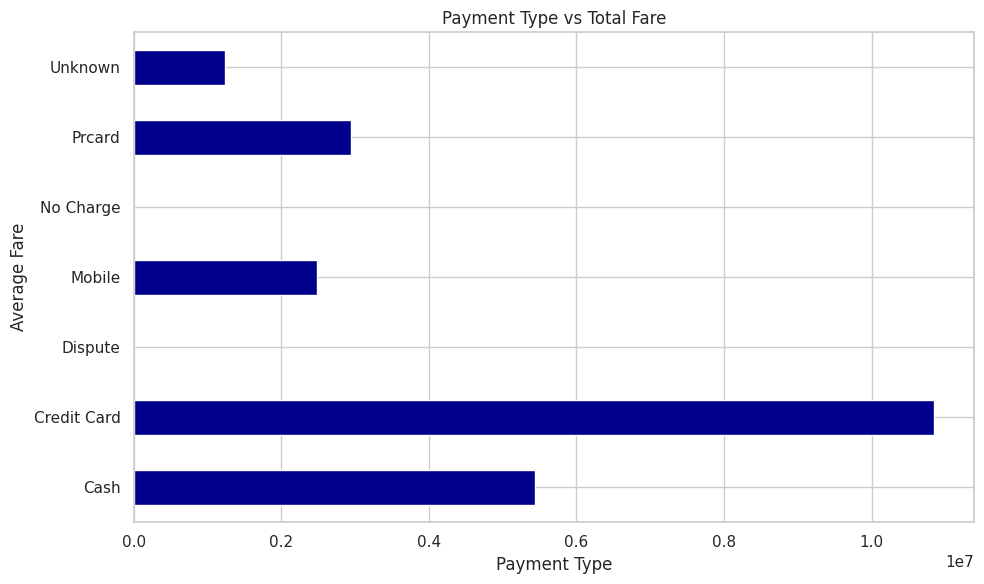

In [59]:
plt.figure(figsize=(10, 6))
total_fare.plot(kind = 'barh', color = 'darkblue')
plt.title("Payment Type vs Total Fare")
plt.xlabel("Payment Type")
plt.ylabel("Average Fare")
plt.tight_layout()
plt.show()

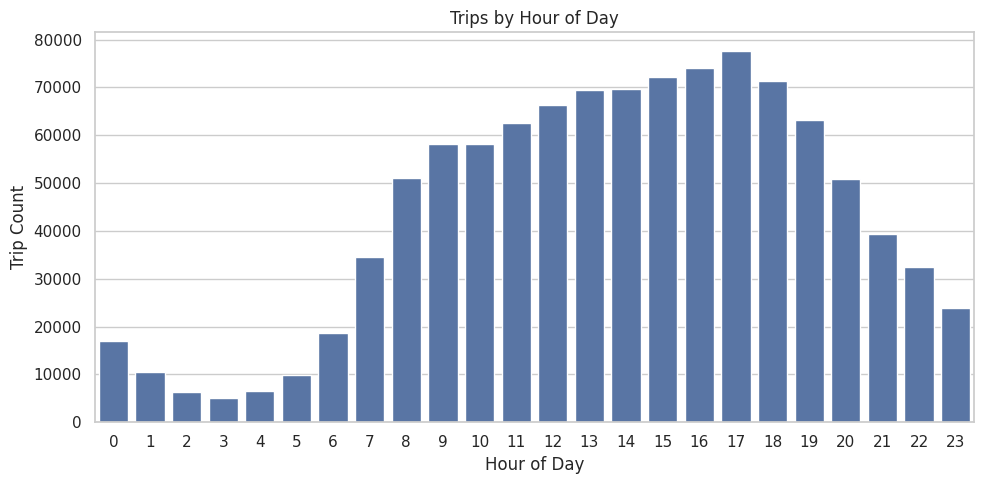

In [36]:
#Trips by Hour
plt.figure(figsize = (10, 5))
sns.countplot(x='trip_hour', data=df)
plt.title("Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()

In [37]:
top_companies = df.groupby('company')['trip_total'].sum().sort_values(ascending = False).head(10)
print(top_companies)

company
Flash Cab                       5.394085e+06
Taxi Affiliation Services       5.346922e+06
Sun Taxi                        3.343816e+06
Taxicab Insurance Agency Llc    3.023517e+06
City Service                    2.607582e+06
Chicago Independents            1.739764e+06
5 Star Taxi                     1.463975e+06
Globe Taxi                      9.593045e+05
Medallion Leasin                8.952181e+05
Blue Ribbon Taxi Association    8.873850e+05
Name: trip_total, dtype: float64


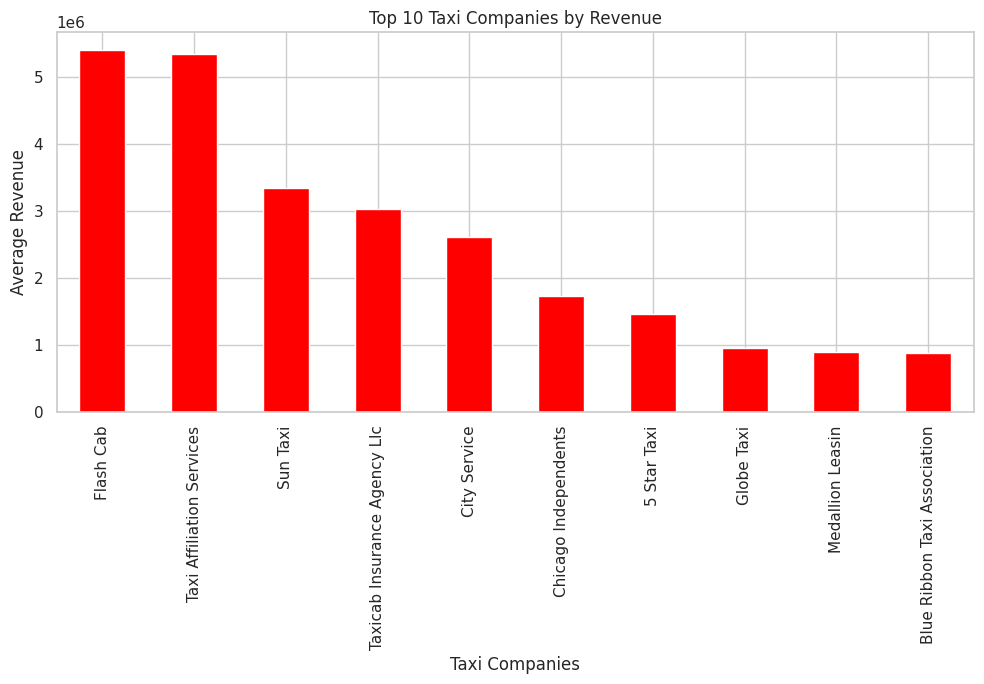

In [39]:
#top 10 revenue Generating companies
plt.figure(figsize=(10,7))
top_companies.plot(kind='bar', color ='red')
plt.title('Top 10 Taxi Companies by Revenue')
plt.xlabel('Taxi Companies')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()

In [40]:
# Count each range
tripsdistribution = df['distance_label'].value_counts()
print(tripsdistribution)

distance_label
Very Short Distance    468830
Long Distance          312167
Short Distance         149718
Medium Distance        117860
Name: count, dtype: int64


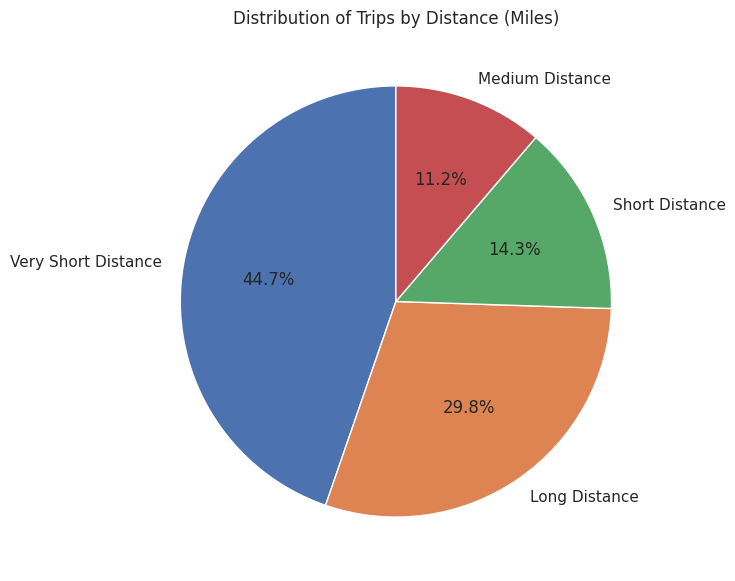

In [41]:
#Distribution by Distances
plt.figure(figsize=(7,7))
plt.pie(tripsdistribution, labels=tripsdistribution.index, autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Trips by Distance (Miles)")
plt.show()


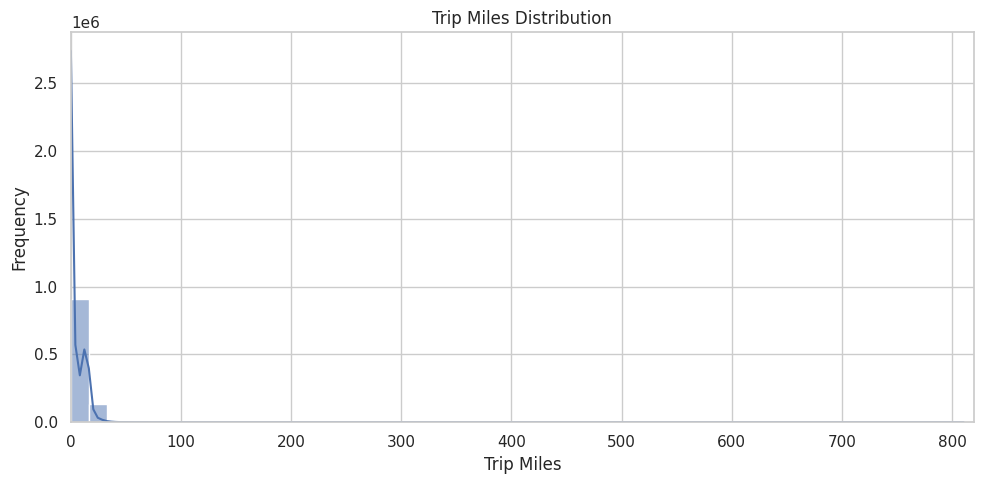

In [42]:
#trip miles Distribution
sns.histplot(df['trip_miles'], bins=50, kde=True)
plt.xlim(0, 820)
plt.title("Trip Miles Distribution")
plt.xlabel("Trip Miles")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [43]:
#Distribution by Duration Labels
# Count each range
timedistribution = df.groupby('duration_label')['trip_total'].mean().sort_values(ascending = False)
print(timedistribution)

duration_label
Long Trip          92.936542
Medium Trip        61.721834
Very Long Trip     51.515325
Short Trip         50.130541
Very Short Trip    19.733349
Name: trip_total, dtype: float64


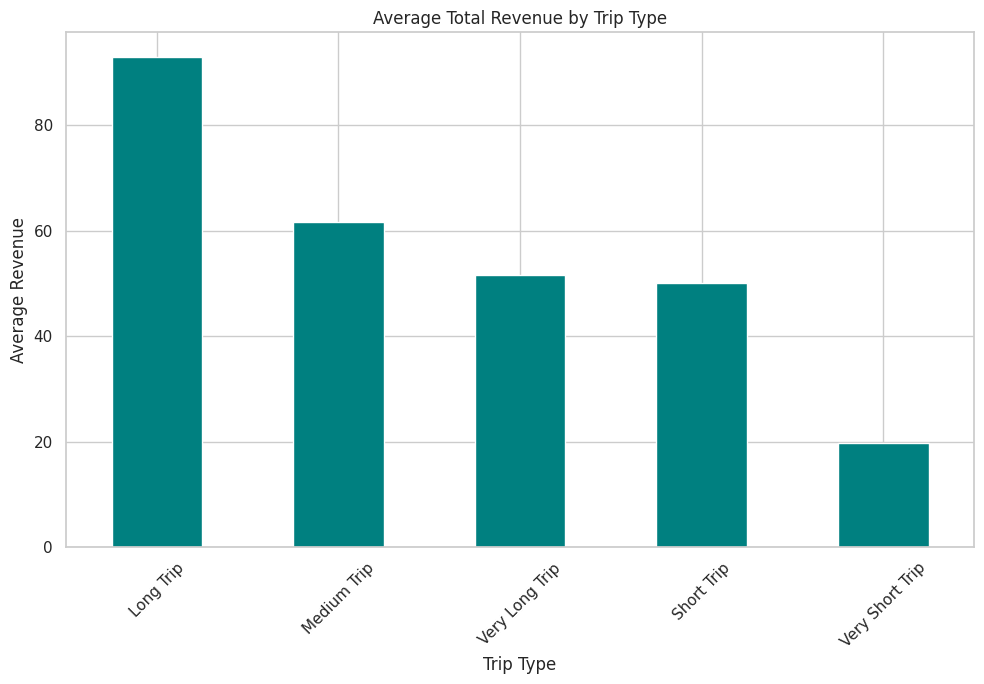

In [44]:
plt.figure(figsize=(10,7))
timedistribution.plot(kind='bar', color ='teal')
plt.title('Average Total Revenue by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
weekday_trips = df[df['trip_day'].isin(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_trips = df[df['trip_day'].isin(['Saturday','Sunday'])]

counts = {
    'Weekday': len(weekday_trips),
    'Weekend': len(weekend_trips)
}

print(counts)

{'Weekday': 798038, 'Weekend': 250537}


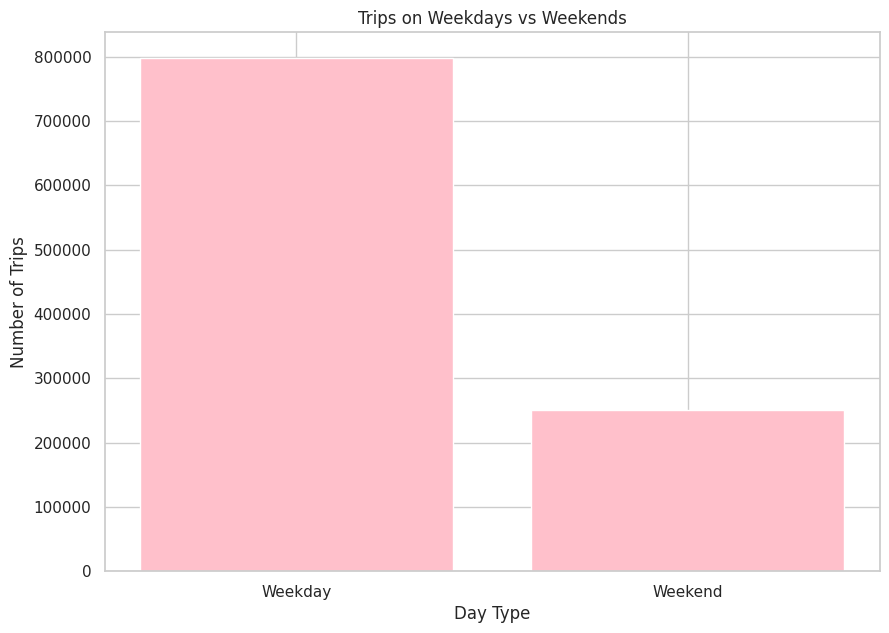

In [46]:
#weekdays vs weekends taxi rides
plt.figure(figsize = (10, 7))
plt.bar(counts.keys(), counts.values(), color = "pink")
plt.title("Trips on Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.show()